In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df=pd.read_csv("health_activity_data.csv")

In [3]:
df.head()

,ID,Age,Gender,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Blood_Pressure,Exercise_Hours_per_Week,Smoker,Alcohol_Consumption_per_Week,Diabetic,Heart_Disease
0,1,56,Male,164,81,30.72,5134,1796,8.6,102,137/72,8.1,No,7,No,No
1,2,69,Male,156,82,20.86,12803,1650,4.5,103,129/65,3.7,No,7,No,No
2,3,46,Female,158,65,30.93,16408,1756,4.3,74,127/68,3.2,Yes,0,No,No
3,4,32,Male,197,87,31.19,18420,2359,4.1,116,125/86,8.5,No,5,No,No
4,5,60,Male,157,63,29.37,17351,2556,5.1,111,100/64,8.5,Yes,8,No,No


In [4]:
df.columns

Index(['ID', 'Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
       'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate', 'Blood_Pressure',
       'Exercise_Hours_per_Week', 'Smoker', 'Alcohol_Consumption_per_Week',
       'Diabetic', 'Heart_Disease'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Height_cm                     1000 non-null   int64  
 4   Weight_kg                     1000 non-null   int64  
 5   BMI                           1000 non-null   float64
 6   Daily_Steps                   1000 non-null   int64  
 7   Calories_Intake               1000 non-null   int64  
 8   Hours_of_Sleep                1000 non-null   float64
 9   Heart_Rate                    1000 non-null   int64  
 10  Blood_Pressure                1000 non-null   object 
 11  Exercise_Hours_per_Week       1000 non-null   float64
 12  Smoker                        1000 non-null   object 
 13  Alco

In [6]:
df.isna().sum()

ID                              0
Age                             0
Gender                          0
Height_cm                       0
Weight_kg                       0
BMI                             0
Daily_Steps                     0
Calories_Intake                 0
Hours_of_Sleep                  0
Heart_Rate                      0
Blood_Pressure                  0
Exercise_Hours_per_Week         0
Smoker                          0
Alcohol_Consumption_per_Week    0
Diabetic                        0
Heart_Disease                   0
dtype: int64

In [7]:
df.describe()

,ID,Age,Height_cm,Weight_kg,BMI,Daily_Steps,Calories_Intake,Hours_of_Sleep,Heart_Rate,Exercise_Hours_per_Week,Alcohol_Consumption_per_Week
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,49.857000,174.74500,84.35200,26.729510,10717.034000,2327.117000,6.90990,84.710000,5.045500,4.573000
std,288.819436,18.114267,14.54192,20.06596,4.786341,5444.707891,657.847942,1.77964,20.130155,2.847801,2.852509
min,1.000000,18.000000,150.00000,50.00000,18.500000,1016.000000,1201.000000,4.00000,50.000000,0.000000,0.000000
25%,250.750000,35.000000,162.00000,68.00000,22.600000,6028.250000,1745.750000,5.30000,67.000000,2.675000,2.000000
50%,500.500000,50.000000,175.00000,84.00000,26.800000,10898.000000,2328.500000,6.90000,84.000000,5.100000,5.000000
75%,750.250000,66.000000,187.00000,101.00000,30.850000,15253.250000,2880.000000,8.40000,103.000000,7.600000,7.000000
max,1000.000000,79.000000,199.00000,119.00000,34.980000,19931.000000,3498.000000,10.00000,119.000000,10.000000,9.000000


In [19]:
df.shape

(1000, 16)

In [20]:
# 1. Convert categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Smoker'] = df['Smoker'].map({'No': 0, 'Yes': 1})
df['Diabetic'] = df['Diabetic'].map({'No': 0, 'Yes': 1})
df['Heart_Disease'] = df['Heart_Disease'].map({'No': 0, 'Yes': 1})

In [22]:
# 2. Split Blood Pressure into two columns
df[['Max_BP', 'Min_BP']] = df['Blood_Pressure'].str.split('/', expand=True)
df['Max_BP'] = pd.to_numeric(df['Max_BP'])
df['Min_BP'] = pd.to_numeric(df['Min_BP'])

In [33]:
# 3. Drop unnecessary columns
cols_to_drop = ['ID', 'Blood_Pressure']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [44]:
# 4. Check for errors (e.g., truncated BP or inconsistent BMI)
# Verify Blood Pressure for ID 306 (index 305 in 0-based indexing)
print("Blood Pressure for ID 306:", df.loc[305, ['Max_BP', 'Min_BP']])

Blood Pressure for ID 306: Max_BP    117.0
Min_BP     88.0
Name: 305, dtype: float64


In [42]:
# 5. View the updated dataset
print("\nUpdated Dataset (first 5 rows):\n", df.head())
print("\nUpdated Data Types:\n", df.dtypes)


Updated Dataset (first 5 rows):
    Age  Gender  Height_cm  Weight_kg    BMI  Daily_Steps  Calories_Intake  \
0   56       0        164         81  30.72         5134             1796   
1   69       0        156         82  20.86        12803             1650   
2   46       1        158         65  30.93        16408             1756   
3   32       0        197         87  31.19        18420             2359   
4   60       0        157         63  29.37        17351             2556   

   Hours_of_Sleep  Heart_Rate  Exercise_Hours_per_Week  Smoker  \
0             8.6         102                      8.1       0   
1             4.5         103                      3.7       0   
2             4.3          74                      3.2       1   
3             4.1         116                      8.5       0   
4             5.1         111                      8.5       1   

   Alcohol_Consumption_per_Week  Diabetic  Heart_Disease  Max_BP  Min_BP  \
0                             

In [49]:
print("Heart_Disease Distribution:\n", df['Heart_Disease'].value_counts())
# 0-NO
# 1-YES

Heart_Disease Distribution:
 Heart_Disease
0    907
1     93
Name: count, dtype: int64


---
## Data Visualization

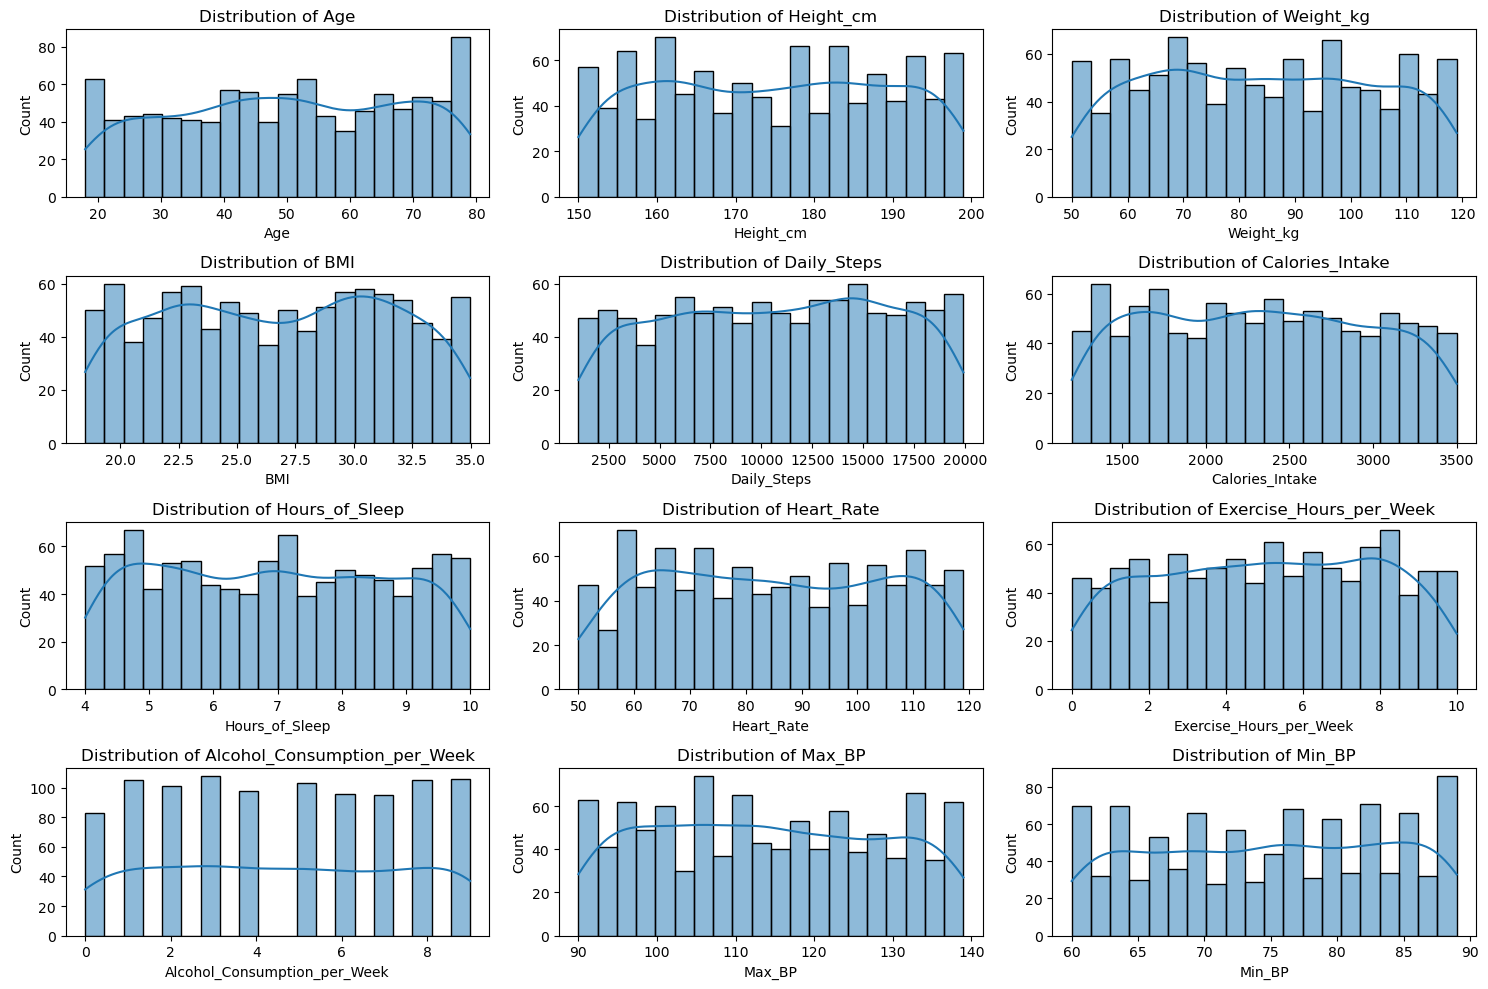

In [51]:
# 1. Distribution of Numeric Features (Histograms)
numeric_cols = ['Age', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps', 
                'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate', 
                'Exercise_Hours_per_Week', 'Alcohol_Consumption_per_Week', 
                'Max_BP', 'Min_BP']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

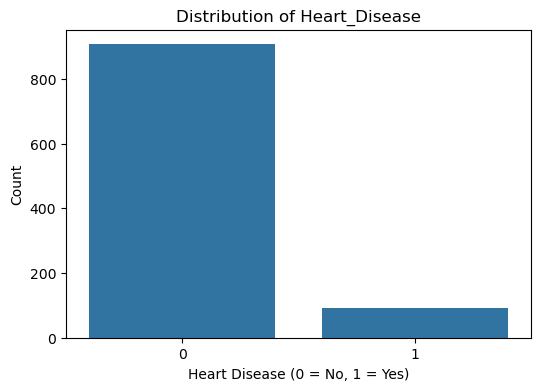

In [52]:
# 2. Target Variable Distribution (Bar Plot)
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart_Disease', data=df)
plt.title('Distribution of Heart_Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

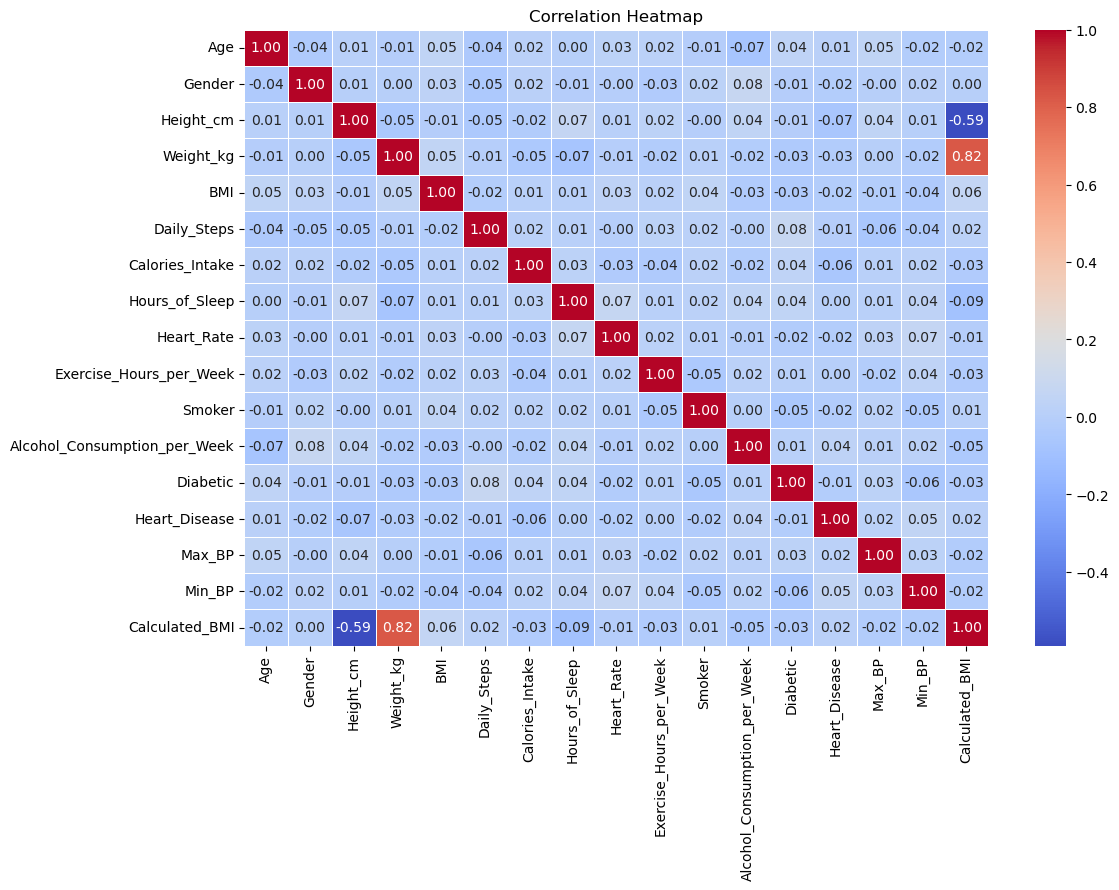

In [53]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

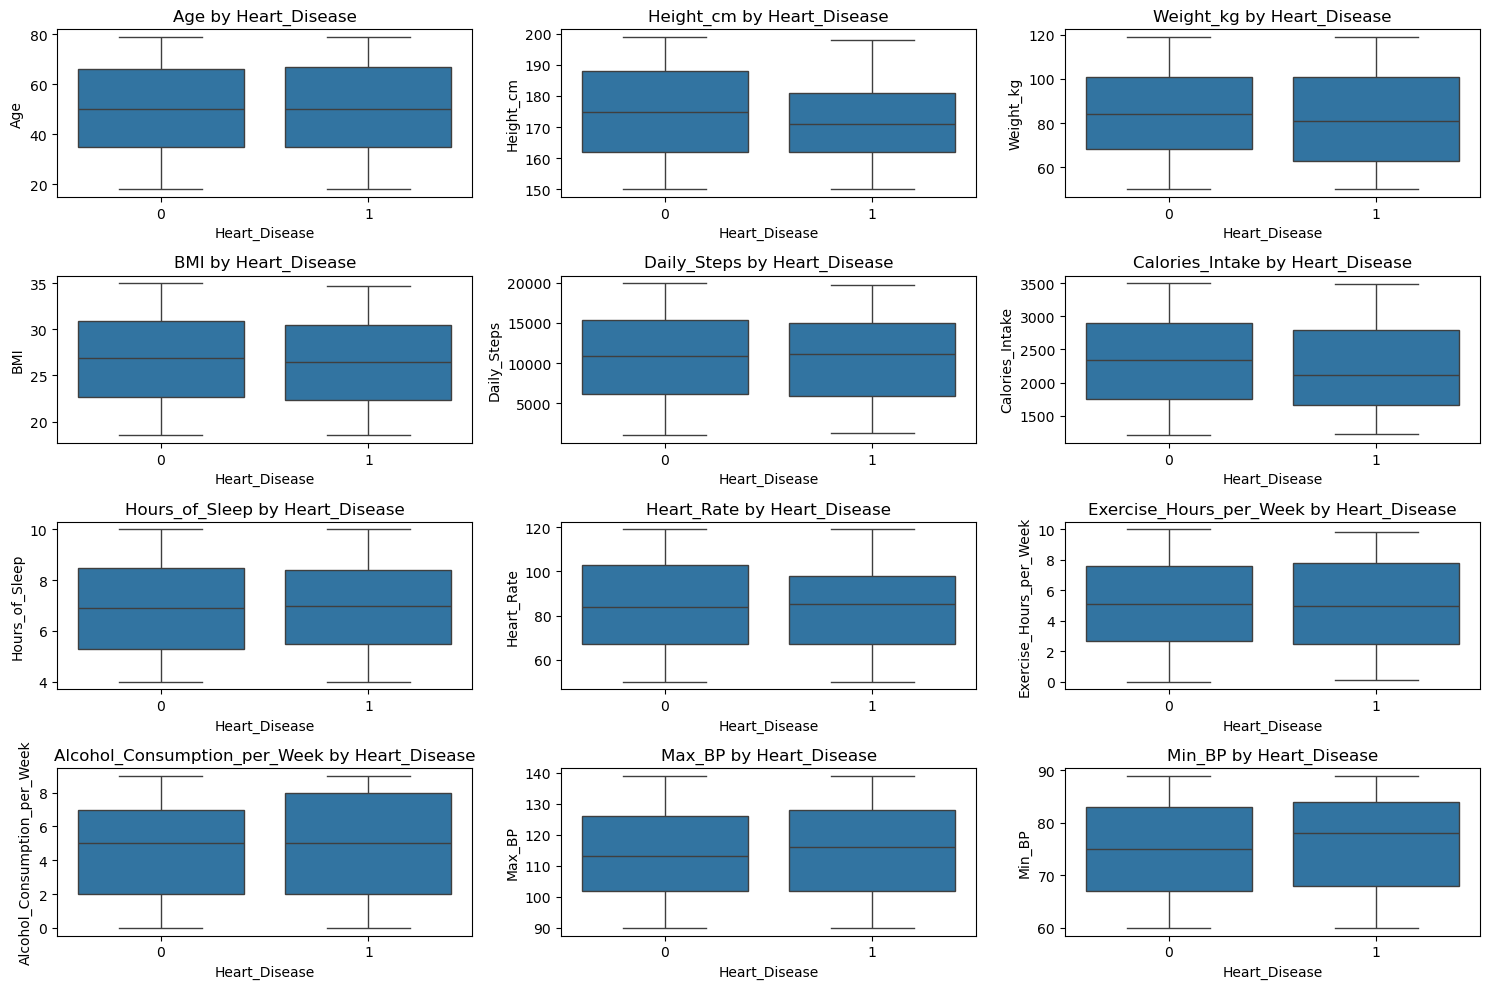

In [54]:
# 4. Box Plots (Numeric Features by Heart_Disease)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='Heart_Disease', y=col, data=df)
    plt.title(f'{col} by Heart_Disease')
plt.tight_layout()
plt.show()

In [58]:
df.columns

Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'BMI', 'Daily_Steps',
       'Calories_Intake', 'Hours_of_Sleep', 'Heart_Rate',
       'Exercise_Hours_per_Week', 'Smoker', 'Alcohol_Consumption_per_Week',
       'Diabetic', 'Heart_Disease', 'Max_BP', 'Min_BP', 'Calculated_BMI'],
      dtype='object')

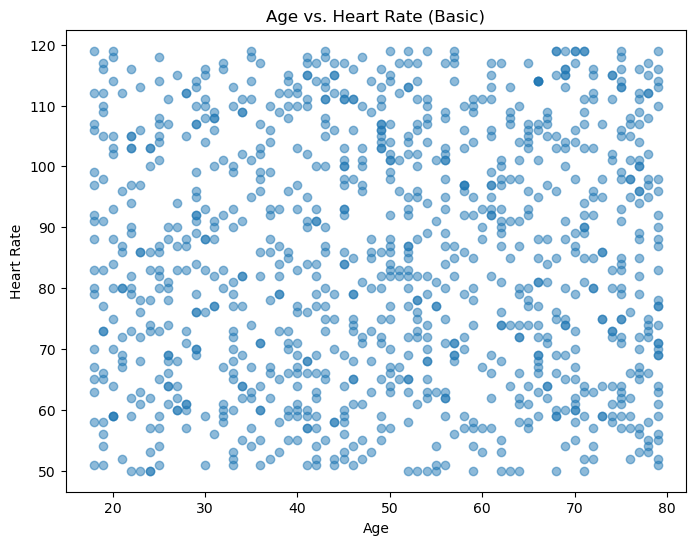

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Heart_Rate'], alpha=0.5)
plt.title('Age vs. Heart Rate (Basic)')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show()

C:\Users\PARAM\AppData\Local\Temp\ipykernel_2548\205692452.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_heart_disease = df.groupby('Age_Group')['Heart_Disease'].mean().reset_index()


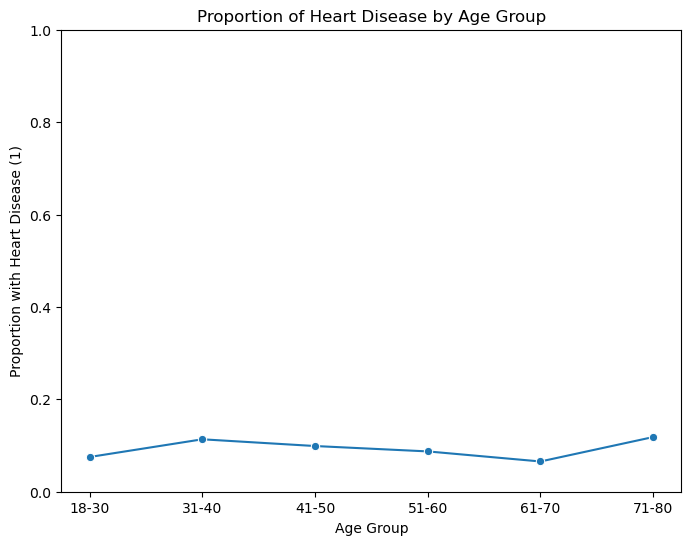

In [70]:
# Create age bins (e.g., 18-30, 31-40, ..., 71-80)
bins = [18, 30, 40, 50, 60, 70, 80]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

# Calculate the proportion of Heart_Disease = 1 per age group
age_heart_disease = df.groupby('Age_Group')['Heart_Disease'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age_Group', y='Heart_Disease', data=age_heart_disease, marker='o')
plt.title('Proportion of Heart Disease by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion with Heart Disease (1)')
plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1 (proportion)
plt.show()

---
### Data Splitting

In [72]:
X = df.drop(columns=['Heart_Disease', 'Age_Group'])  # Features
y = df['Heart_Disease']  # Target

In [73]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y, random_state=42)

In [74]:
# Verify the splits
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nTraining set Heart_Disease distribution:\n", y_train.value_counts())
print("Test set Heart_Disease distribution:\n", y_test.value_counts())

Training set shape: (800, 16)
Test set shape: (200, 16)

Training set Heart_Disease distribution:
 Heart_Disease
0    726
1     74
Name: count, dtype: int64
Test set Heart_Disease distribution:
 Heart_Disease
0    181
1     19
Name: count, dtype: int64


---
### Feature Scaling For KNN

In [76]:
# 1. Scale the features (required for KNN, optional for others)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---
## Model Training

In [77]:
# Initialize models
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default k=5, tunable
gbc_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [78]:
# Train and evaluate each model
models = {'Random Forest': rf_model, 'KNN': knn_model, 'Gradient Boosting': gbc_model}
for name, model in models.items():
    # Train
    if name == 'KNN':  # KNN requires scaled data
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:  # Random Forest and GBC can use unscaled data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)